# Real World Data Is Not Normal Distributed
Look at `diamonds`, `txhousing` and

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

# import datasets
from plotnine.data import diamonds, txhousing
from sklearn.datasets import load_boston, load_diabetes, load_iris
from statsmodels.datasets import fair

boston = load_boston(return_X_y=True)[1]
diabetes = load_diabetes(return_X_y=True)[1]
iris = load_iris()['data']

affairs = fair.load_pandas()

Text(0.5, 1.0, 'QQ Plot of diamonds price')

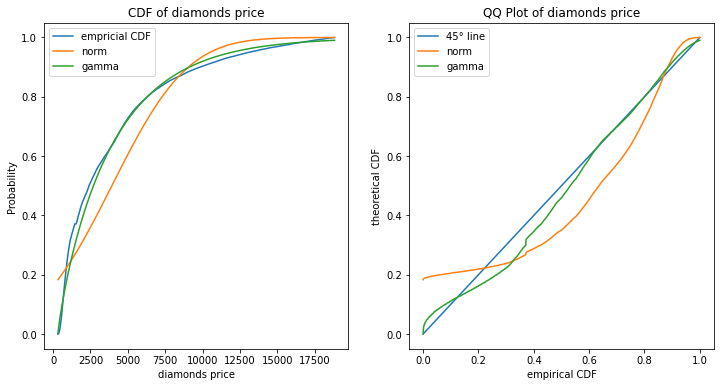

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(6*2, 6))

y = np.sort(diamonds['price'])
ecdf = ECDF(y)
axes[0].plot(y, ecdf(y), label='empricial CDF')
axes[1].plot(ecdf(y), ecdf(y), label='45° line')

DISTRIBUTIONS = [stats.norm, stats.gamma]#, stats.poisson, ]

for dist in DISTRIBUTIONS:
    params = dist.fit(y)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    
    # Plot CDF
    axes[0].plot(y, dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)
    # QQ-Plot but with exchanged x- and y-axis such that x-axis stays stable
    axes[1].plot(ecdf(y), dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)

axes[0].legend()
axes[0].set_xlabel('diamonds price')
axes[0].set_ylabel('Probability')
axes[0].set_title('CDF of diamonds price')

axes[1].legend()
axes[1].set_xlabel('empirical CDF')
axes[1].set_ylabel('theoretical CDF')
axes[1].set_title('QQ Plot of diamonds price')

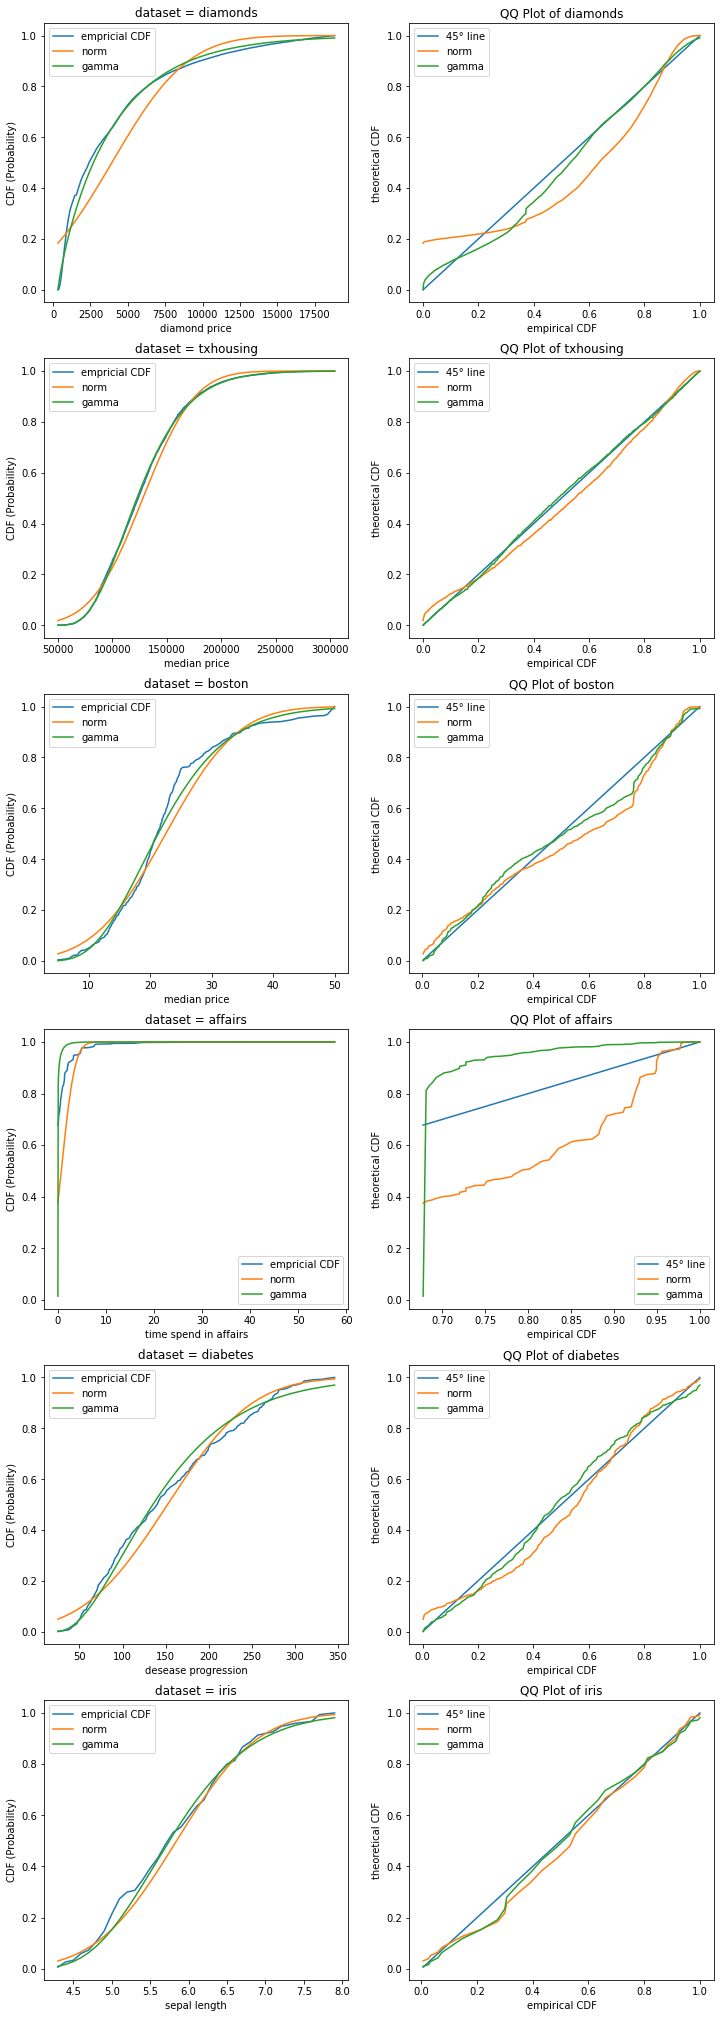

In [70]:
# https://stackoverflow.com/a/37616966 used as template
DISTRIBUTIONS = [stats.norm, stats.gamma] # maybe add stats.invgauss

fig, axes = plt.subplots(6, 2, figsize=(6*2, 6*6))
for (name, target, y), axes in zip([['diamonds', 'diamond price', diamonds['price']],
                                  ['txhousing', 'median price', txhousing['median']],
                                  ['boston', 'median price', boston],
                                  ['affairs', 'time spend in affairs', affairs.data['affairs']],
                                  ['diabetes', 'desease progression', diabetes],
                                  ['iris', 'sepal length', iris[:, 0]]],
                                 axes):
    y = np.sort(pd.Series(y).dropna())  # txhousing has NA valeus
    ecdf = ECDF(y)
    axes[0].plot(y, ecdf(y), label='empricial CDF')
    axes[1].plot(ecdf(y), ecdf(y), label='45° line')
    for dist in DISTRIBUTIONS:
        #fit distribution to data
        params = dist.fit(y)
        # Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        # Plot CDF
        axes[0].plot(y, dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)
        # QQ-Plot but with exchanged x- and y-axis such that x-axis stays stable
        axes[1].plot(ecdf(y), dist.cdf(y, loc=loc, scale=scale, *arg), label=dist.name)
    
    axes[0].legend()
    axes[0].set_xlabel(target)
    axes[0].set_ylabel("CDF (Probability)")
    axes[0].set_title("dataset = " + name)
    
    axes[1].legend()
    axes[1].set_xlabel('empirical CDF')
    axes[1].set_ylabel('theoretical CDF')
    axes[1].set_title('QQ Plot of ' + name)

Sometimes, Gamma is clearly better (diamonds, txhousing, diabetes), other times its more or less even at first sight (boston, affairs, iris).

## Poisson (without overdispersion) becomes sharper as $\mu$ increases.
Reason: $Std[Y] = \sqrt{Var[Y]} = \sqrt{\mu}$

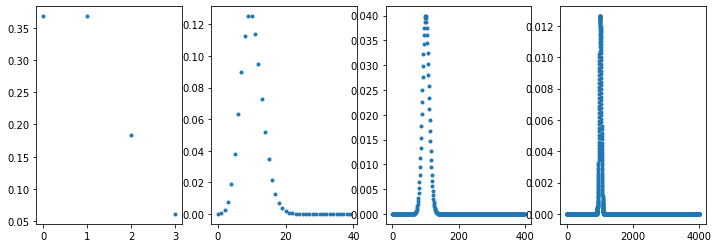

In [84]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i, mu in enumerate([1, 10, 100, 1000]):
    x = np.arange(0, 4*mu)
    axes[i].plot(x, stats.poisson.pmf(x, mu=mu), '.')